In [ ]:
# !pip install wandb
import wandb
import pandas as pd

wandb.login()
# fingpt-forecaster-llama3

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jw4698 (jw4698-columbia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
project_name = "fingpt-forecaster-llama3"

api = wandb.Api()

runs = api.runs(project_name)

data = []
for run in runs:
    run_data = {
        "name": run.name,
        "id": run.id,
        "config": run.config,
        "summary": run.summary._json_dict,
        "history": run.history()
    }
    data.append(run_data)


dflla = pd.DataFrame(data)["history"][0]

In [ ]:

project_name = "fingpt-forecaster-deepseek"


api = wandb.Api()


runs = api.runs(project_name)


data = []
for run in runs:

    run_data = {
        "name": run.name,
        "id": run.id,
        "config": run.config,
        "summary": run.summary._json_dict,
        "history": run.history()
    }
    data.append(run_data)


dfds = pd.DataFrame(data)["history"][0]

In [ ]:

project_name = "fingpt-forecaster"

api = wandb.Api()

runs = api.runs(project_name)


data = []
for run in runs:
    run_data = {
        "name": run.name,
        "id": run.id,
        "config": run.config,
        "summary": run.summary._json_dict,
        "history": run.history()
    }
    data.append(run_data)

dfll2 = pd.DataFrame(data)["history"][0]

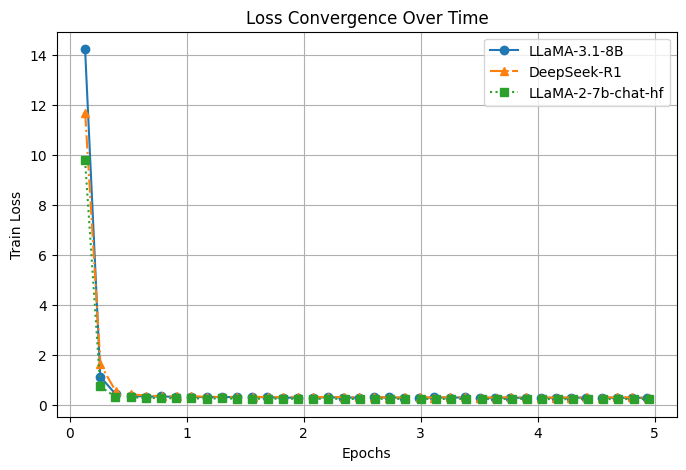

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(dflla['train/epoch'], dflla['train/loss'], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfds['train/epoch'], dfds['train/loss'], label="DeepSeek-R1", linestyle="-.", marker="^")
plt.plot(dfll2['train/epoch'], dfll2['train/loss'], label="LLaMA-2-7b-chat-hf", linestyle=":", marker="s")

plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Loss Convergence Over Time")
plt.legend()
plt.grid(True)
plt.show()

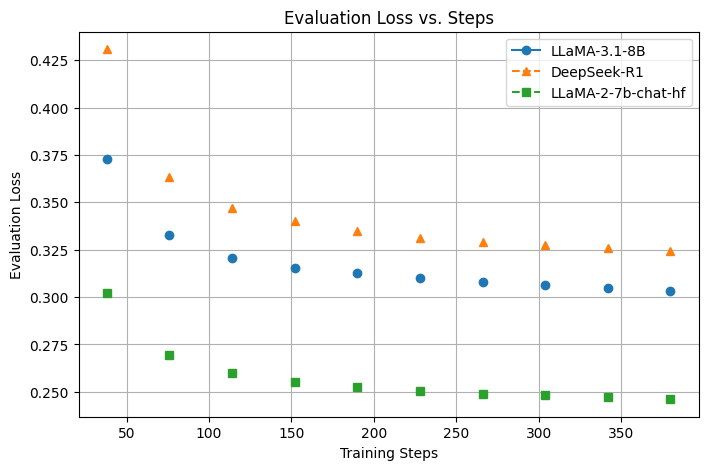

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dflla['train/global_step'], dflla['eval/loss'], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfds['train/global_step'], dfds['eval/loss'], label="DeepSeek-R1", linestyle="--", marker="^")
plt.plot(dfll2['train/global_step'], dfll2['eval/loss'], label="LLaMA-2-7b-chat-hf", linestyle="--", marker="s")
plt.xlabel("Training Steps")
plt.ylabel("Evaluation Loss")
plt.title("Evaluation Loss vs. Steps")
plt.legend()
plt.grid(True)
plt.show()

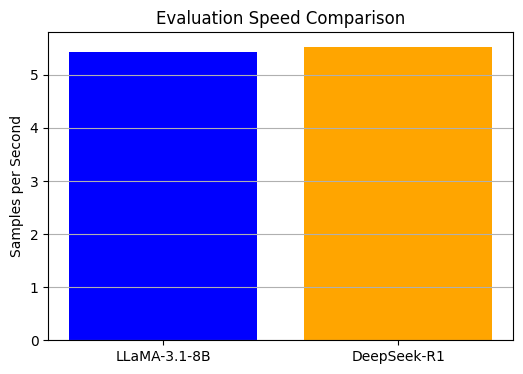

In [ ]:
models = ["LLaMA-3.1-8B", "DeepSeek-R1"]
eval_speed = [dflla["eval/samples_per_second"].mean(), dfds["eval/samples_per_second"].mean()]

plt.figure(figsize=(6, 4))
plt.bar(models, eval_speed, color=["blue", "orange"])
plt.ylabel("Samples per Second")
plt.title("Evaluation Speed Comparison")
plt.grid(axis="y")
plt.show()

In [ ]:
dfds2 = dfds[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()
dflla2 = dflla[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()
dfll22 = dfll2[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()

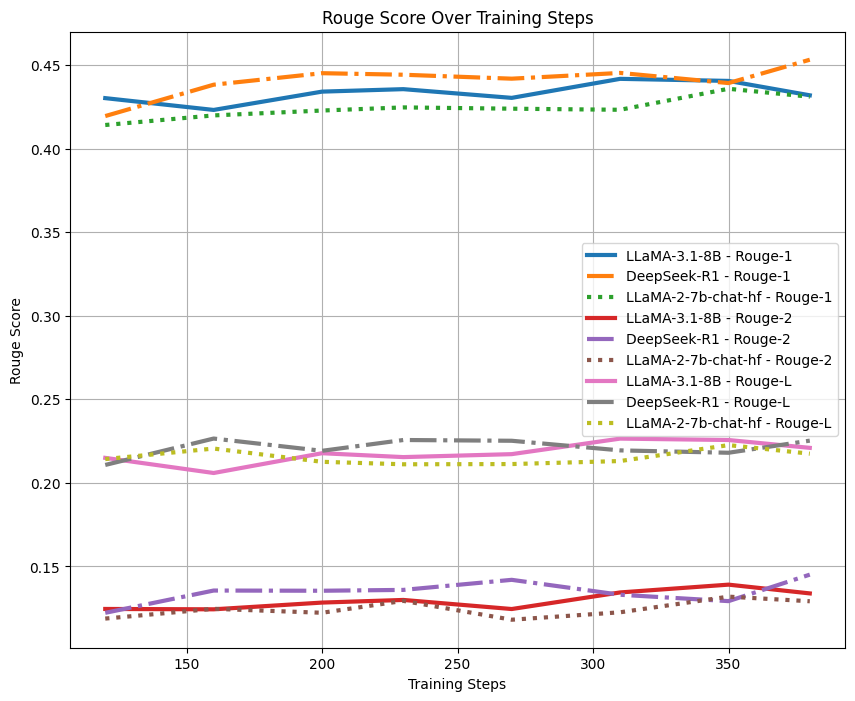

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(dflla2['train/global_step'], dflla2['anal_rouge_scores.rouge1'], label="LLaMA-3.1-8B - Rouge-1", linestyle="-",linewidth=3)
plt.plot(dfds2['train/global_step'], dfds2['anal_rouge_scores.rouge1'], label="DeepSeek-R1 - Rouge-1", linestyle="-.",linewidth=3)
plt.plot(dfll22['train/global_step'], dfll22['anal_rouge_scores.rouge1'], label="LLaMA-2-7b-chat-hf - Rouge-1", linestyle=":",linewidth=3)

plt.plot(dflla2['train/global_step'], dflla2['anal_rouge_scores.rouge2'], label="LLaMA-3.1-8B - Rouge-2", linestyle="-",linewidth=3)
plt.plot(dfds2['train/global_step'], dfds2['anal_rouge_scores.rouge2'], label="DeepSeek-R1 - Rouge-2", linestyle="-.",linewidth=3)
plt.plot(dfll22['train/global_step'], dfll22['anal_rouge_scores.rouge2'], label="LLaMA-2-7b-chat-hf - Rouge-2", linestyle=":",linewidth=3)

plt.plot(dflla2['train/global_step'], dflla2['anal_rouge_scores.rougeL'], label="LLaMA-3.1-8B - Rouge-L", linestyle="-",linewidth=3)
plt.plot(dfds2['train/global_step'], dfds2['anal_rouge_scores.rougeL'], label="DeepSeek-R1 - Rouge-L", linestyle="-.",linewidth=3)
plt.plot(dfll22['train/global_step'], dfll22['anal_rouge_scores.rougeL'], label="LLaMA-2-7b-chat-hf - Rouge-L", linestyle=":",linewidth=3)

plt.xlabel("Training Steps")
plt.ylabel("Rouge Score")
plt.title("Rouge Score Over Training Steps")
plt.legend()
plt.grid(True)
plt.show()

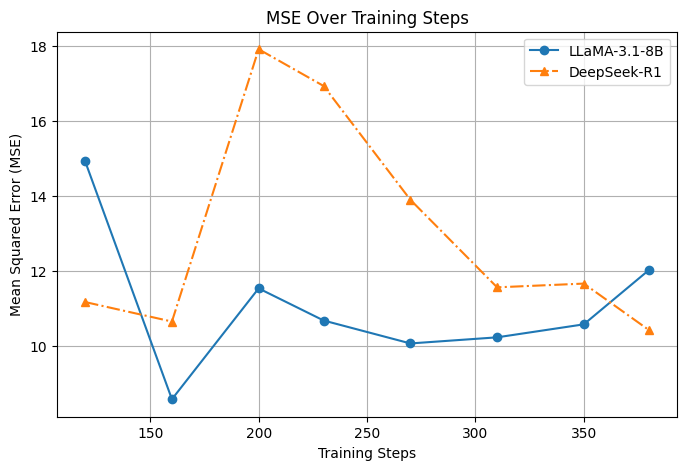

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dflla2['train/global_step'], dflla2["mse"], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfds2['train/global_step'], dfds2["mse"], label="DeepSeek-R1", linestyle="-.", marker="^")
# plt.plot(dfll22['train/global_step'], dfll22["mse"], label="LLaMA-2-7b-chat-hf", linestyle=":", marker="s")

plt.xlabel("Training Steps")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Over Training Steps")
plt.legend()
plt.grid(True)
plt.show()

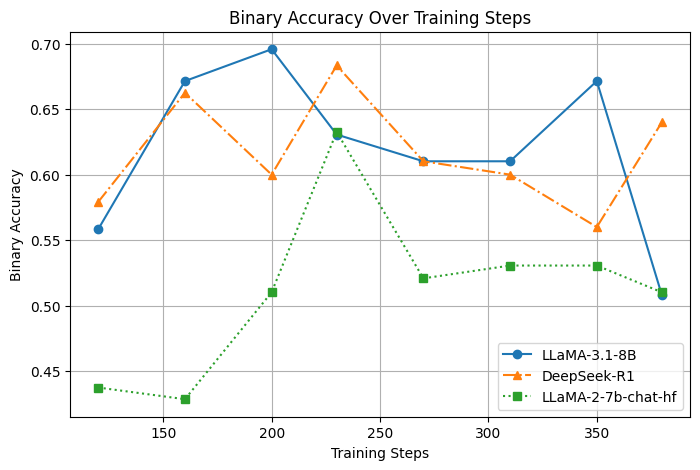

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dflla2['train/global_step'], dflla2["bin_acc"], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfds2['train/global_step'], dfds2["bin_acc"], label="DeepSeek-R1", linestyle="-.", marker="^")
plt.plot(dfll22['train/global_step'], dfll22["bin_acc"], label="LLaMA-2-7b-chat-hf", linestyle=":", marker="s")

plt.xlabel("Training Steps")
plt.ylabel("Binary Accuracy")
plt.title("Binary Accuracy Over Training Steps")
plt.legend()
plt.grid(True)
plt.show()

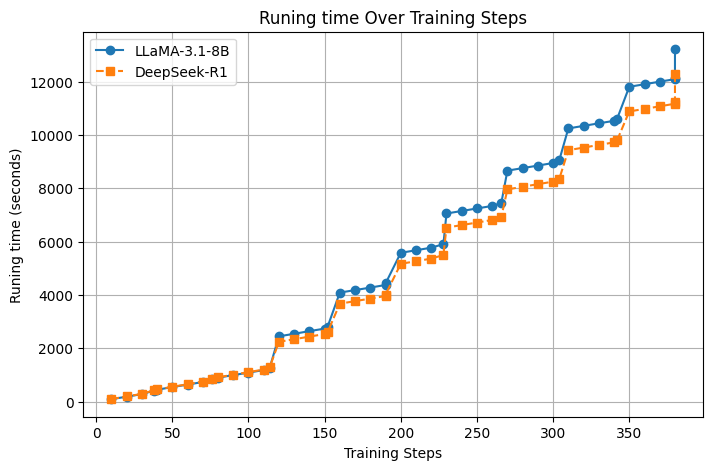

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dflla['train/global_step'], dflla["_runtime"], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfds['train/global_step'], dfds["_runtime"], label="DeepSeek-R1", linestyle="--", marker="s")

plt.xlabel("Training Steps")
plt.ylabel("Runing time (seconds)")
plt.title("Runing time Over Training Steps")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dfdseff = dfds[['train/global_step',"eval/samples_per_second"]].dropna()
dfllaeff = dflla[['train/global_step',"eval/samples_per_second"]].dropna()
dfll2eff = dfll2[['train/global_step',"eval/samples_per_second"]].dropna()

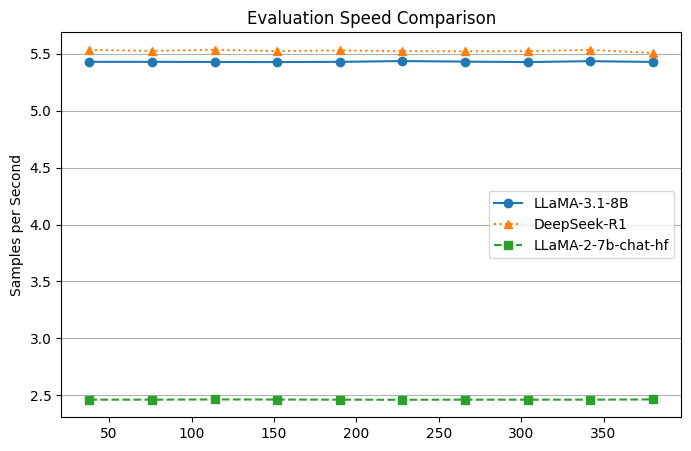

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dfllaeff['train/global_step'], dfllaeff["eval/samples_per_second"], label="LLaMA-3.1-8B", linestyle="-", marker="o")
plt.plot(dfdseff['train/global_step'], dfdseff["eval/samples_per_second"], label="DeepSeek-R1", linestyle=":", marker="^")
plt.plot(dfll2eff['train/global_step'], dfll2eff["eval/samples_per_second"], label="LLaMA-2-7b-chat-hf", linestyle="--", marker="s")

plt.ylabel("Samples per Second")
plt.title("Evaluation Speed Comparison")
plt.legend()
plt.grid(axis="y")
plt.show()